In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/codeforcauseorg/ML-Bootcamp-July/master/datasets/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
cols_not_used = ['PassengerId', 'Name', 'Ticket','Embarked', 'Cabin']
clean_data = data.drop(cols_not_used, axis = 1)

In [6]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
clean_data["Sex"] = le.fit_transform(clean_data["Sex"])

In [10]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
clean_data = clean_data.fillna(clean_data["Age"].mean())

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [13]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [14]:
x = clean_data.iloc[:,1:]
y = clean_data.iloc[:,0:1]

In [15]:
x.shape, y.shape

((891, 6), (891, 1))

In [23]:
# x["Survived"]

In [29]:
#calculating the entrppy
def entropy(cols):
  data, counts = np.unique(cols, return_counts = True)
  #total items
  N = float(cols.shape[0])

  ent = 0.0
  for count in counts:
    p = count/N
    ent += p*np.log2(p)
  return -ent


In [30]:
def divide_data(x_data, fkey, fval):
  x_right = pd.DataFrame([], columns = x_data.columns)
  x_left = pd.DataFrame([], columns = x_data.columns)

  for xi in range(x_data.shape[0]):
    val = x_data[fkey].iloc[xi]

    if val>fval:
      x_right = x_right.append(x_data.iloc[xi])
    else:
      x_left = x_left.append(x_data.iloc[xi])

  return x_left,x_right


In [31]:
#making a binary tree, hence split node into 2
#if a person wants to buy ps5 or not, so we will split the data according to salary, so fkey=Salaries
#salary<10lakh(left child), salary>10lakh(right child)
#fval = 10lakh
def information_gain(x_data, fkey, fval):
  left,right = divide_data(x_data, fkey, fval)

  #% of examples in left and right
  l = float(left.shape[0]/x_data.shape[0])
  r = float(right.shape[0]/x_data.shape[0])

  hs = entropy(x_data.Survived)

  igain = hs - (l*entropy(left.Survived)+r*entropy(right.Survived))
  return igain



In [32]:
for f in x.columns:
  print (f)
  print (information_gain(clean_data, f, clean_data[f].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [36]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=42)

In [38]:
sk_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
sk_tree.predict(x_test[:10])

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [41]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [42]:
sk_tree.score(x_test,y_test)

0.8067796610169492

In [90]:
class CustomDecisionTree:

  def __init__(self, depth=0,max_depth=5):
    self.left = None
    self.right = None
    self.fkey = None
    self.fval = None
    self.max_depth = max_depth
    self.depth = depth
    self.target = None

  def fit(self, x_train):
    features = ['Pclass',	'Sex', 'Age',	'SibSp',	'Parch',	'Fare']
    info_gains = []

    for ix in features:
      ig = information_gain(x_train, ix, x_train[ix].mean())
      info_gains.append(ig)
    
    #taking the feature with maximum info gain as node
    self.fkey = features[np.argmax(info_gains)]
    self.fval = x_train[self.fkey].mean()
    print("Choosing feature", self.fkey)

    #create the tree
    #split the data
    data_left, data_right = divide_data(x_train, self.fkey, self.fval)

    #reset the index from start for each subpart
    data_left = data_left.reset_index(drop=True)
    data_right = data_right.reset_index(drop=True)

    #reached the leaf node(all answers are same before max depth)/ max depth --> stop
    if data_left.shape[0] == 0 or data_right.shape[0] == 0:
      if x_train.Survived.mean()>=0.5:
        self.target = "Survived"
      else:
        self.target = "Not survived"
      return

    if self.depth>=self.max_depth:
      if x_train.Survived.mean()>=0.5:
        self.target = "Survived"
      else:
        self.target = "Not survived"
      return
    
    self.left = CustomDecisionTree(depth=self.depth + 1)
    self.left.fit(data_left)
        
    self.right = CustomDecisionTree(depth=self.depth + 1)
    self.right.fit(data_right)

    if x_train.Survived.mean()>=0.5:
      self.target = "Survived"
    else:
      self.target = "Not survived"
    return

  def predict(self, test):
    if test[self.fkey]>self.fval:
      if self.right is None:
        return self.target
      return self.right.predict(test)
    else:
      if self.left is None:
        return self.target
      return self.left.predict(test)

  # def score(self, xtest, ytest):
  #   return (self.predict(xtest) == ytest).mean()





In [91]:
model = CustomDecisionTree()

In [92]:
split = int(0.7*clean_data.shape[0])
train_data = clean_data[:split]
test_data = clean_data[split:]
test_data = test_data.reset_index(drop=True)
model.fit(train_data)

Choosing feature Sex
Choosing feature Pclass
Choosing feature Age
Choosing feature SibSp
Choosing feature Pclass
Choosing feature Pclass
Choosing feature Age
Choosing feature SibSp
Choosing feature Parch
Choosing feature Pclass
Choosing feature SibSp
Choosing feature Fare
Choosing feature Parch
Choosing feature Pclass
Choosing feature Pclass
Choosing feature Pclass
Choosing feature Pclass
Choosing feature Parch
Choosing feature SibSp
Choosing feature Fare
Choosing feature Age
Choosing feature Age
Choosing feature Fare
Choosing feature Age
Choosing feature Age
Choosing feature Fare
Choosing feature Age
Choosing feature Parch
Choosing feature Fare
Choosing feature Fare
Choosing feature Fare
Choosing feature Pclass
Choosing feature Fare
Choosing feature Parch
Choosing feature Fare
Choosing feature Age
Choosing feature Age
Choosing feature Fare
Choosing feature Fare
Choosing feature SibSp
Choosing feature Fare
Choosing feature Age
Choosing feature Fare
Choosing feature Pclass
Choosing feat

In [93]:
y_pred = []
for i in range(test_data.shape[0]):
  y_pred.append(model.predict(test_data.iloc[i]))
y_pred[:10]

['Not survived',
 'Not survived',
 'Not survived',
 'Not survived',
 'Survived',
 'Not survived',
 'Not survived',
 'Not survived',
 'Not survived',
 'Not survived']

In [94]:
y_actual = test_data.Survived[:10]

In [95]:
y_actual

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Survived, dtype: int64

In [96]:
test_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,21.000000,0,0,7.8542
1,0,3,1,21.000000,0,0,16.1000
2,0,1,1,61.000000,0,0,32.3208
3,0,2,1,57.000000,0,0,12.3500
4,1,1,0,21.000000,0,0,77.9583
...,...,...,...,...,...,...,...
263,0,2,1,27.000000,0,0,13.0000
264,1,1,0,19.000000,0,0,30.0000
265,0,3,0,29.699118,1,2,23.4500
266,1,1,1,26.000000,0,0,30.0000


In [97]:
# model.score(test_data.iloc[:,1:],test_data.iloc[:,0:1])

In [98]:
#visulaising decision tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz 

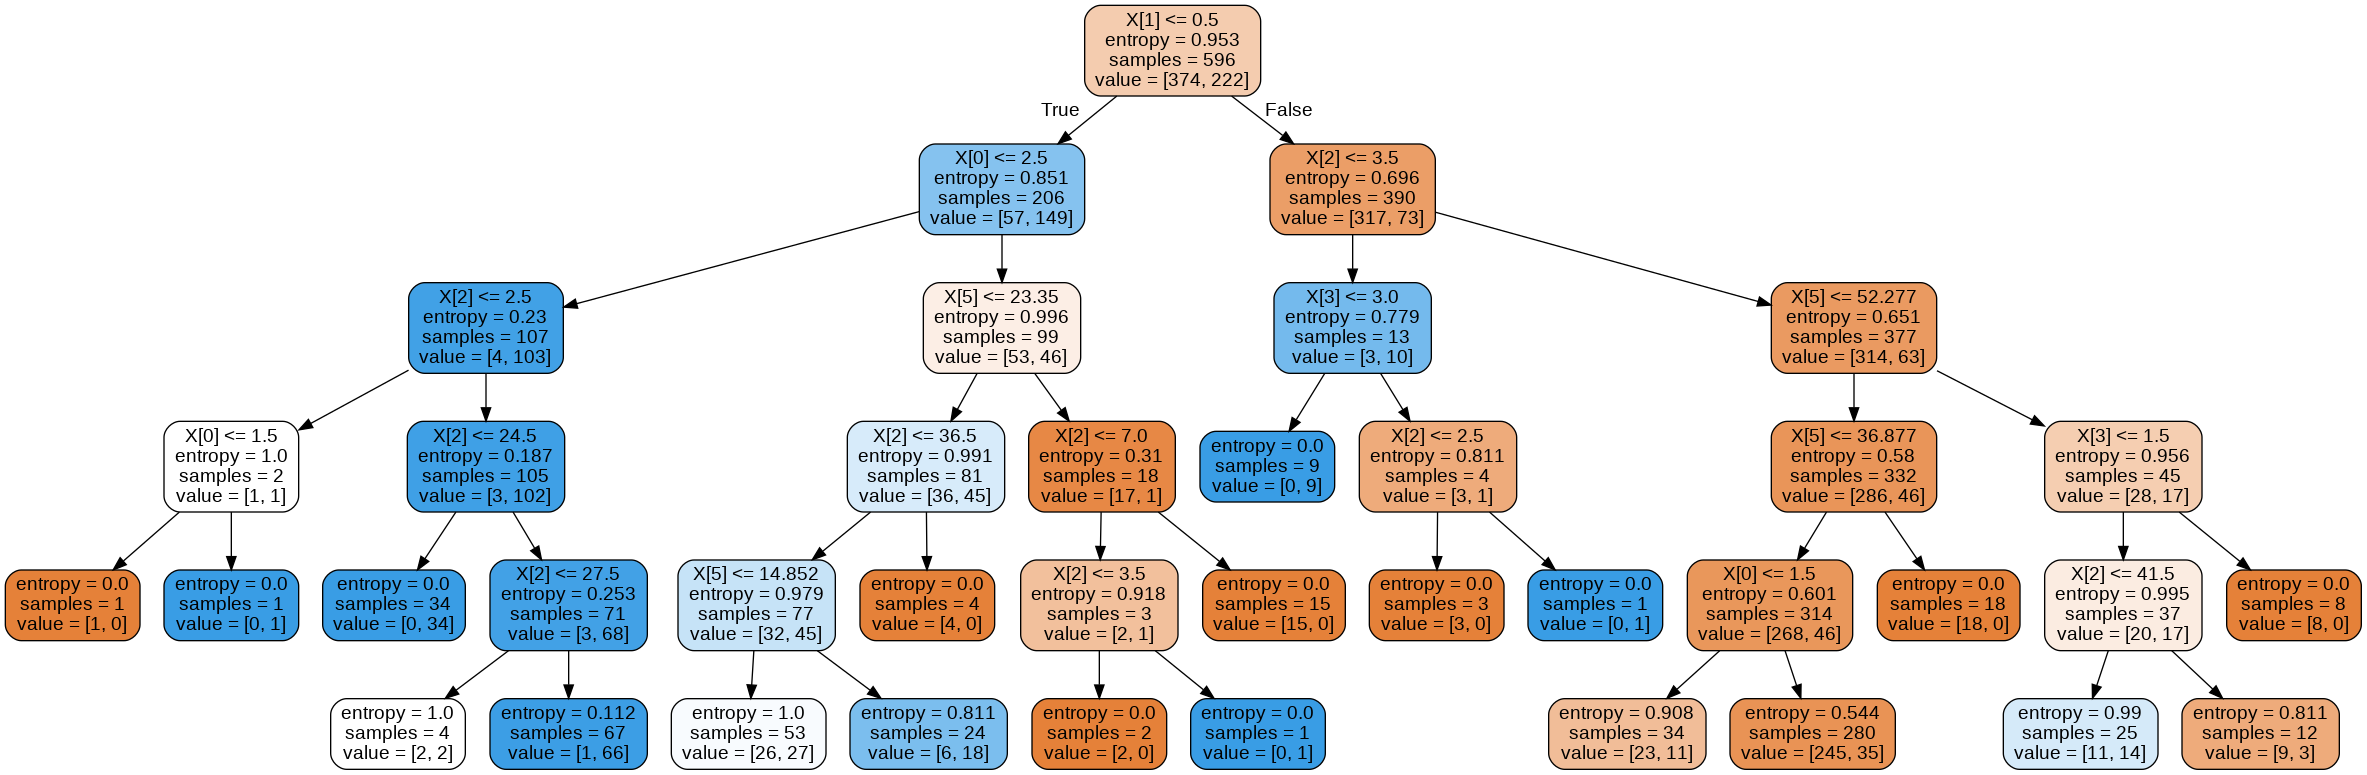

In [102]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())